<a href="https://colab.research.google.com/github/simulate111/Production-Optimization/blob/main/Machine_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install Pyomo and the cbc solver
try:
  not_first_time == True
except:
  !pip install -q pyomo
  !apt-get install -y -qq coinor-cbc
  not_first_time = True
finally:
  print("Pyomo and solver installed")

Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3) ...
Selecting previously unselected package coinor-libcbc3:amd64.
Preparing to unpack .../4-coinor-libcbc3_2.10.7+ds1-1_amd64.deb ...
Unpacking coinor-libcbc3:

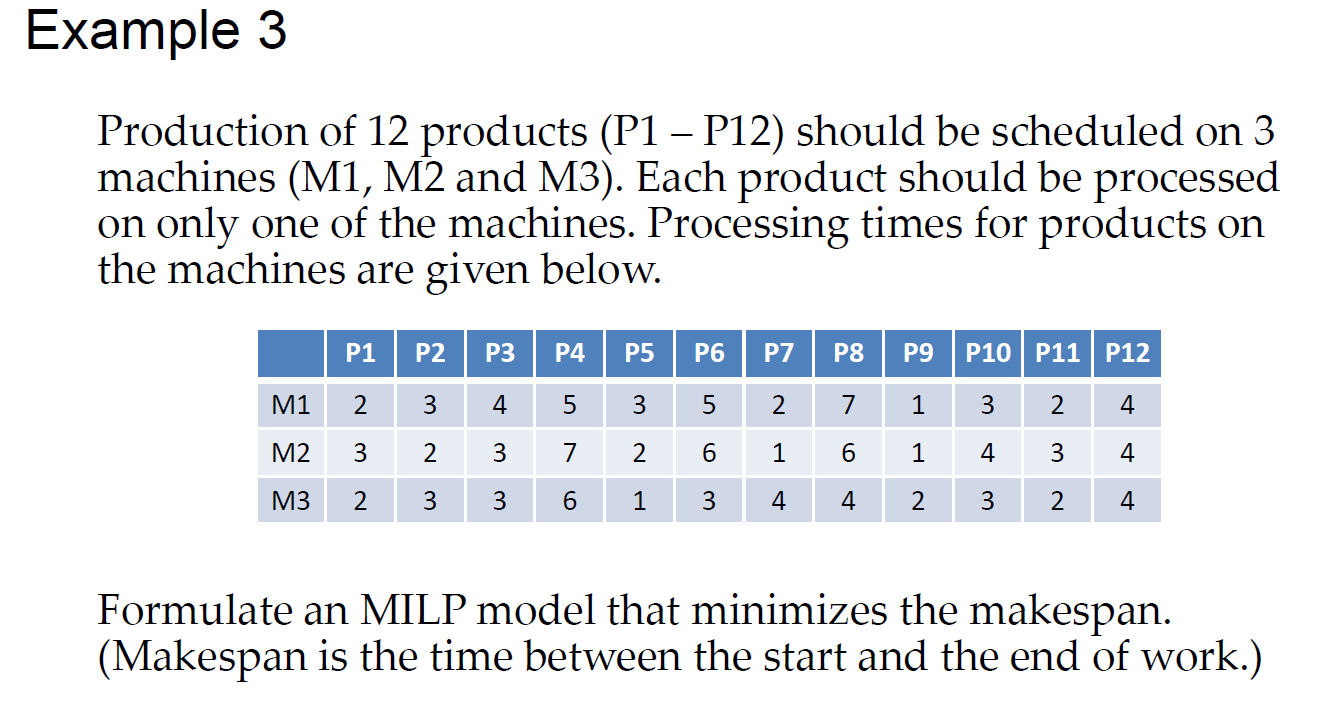

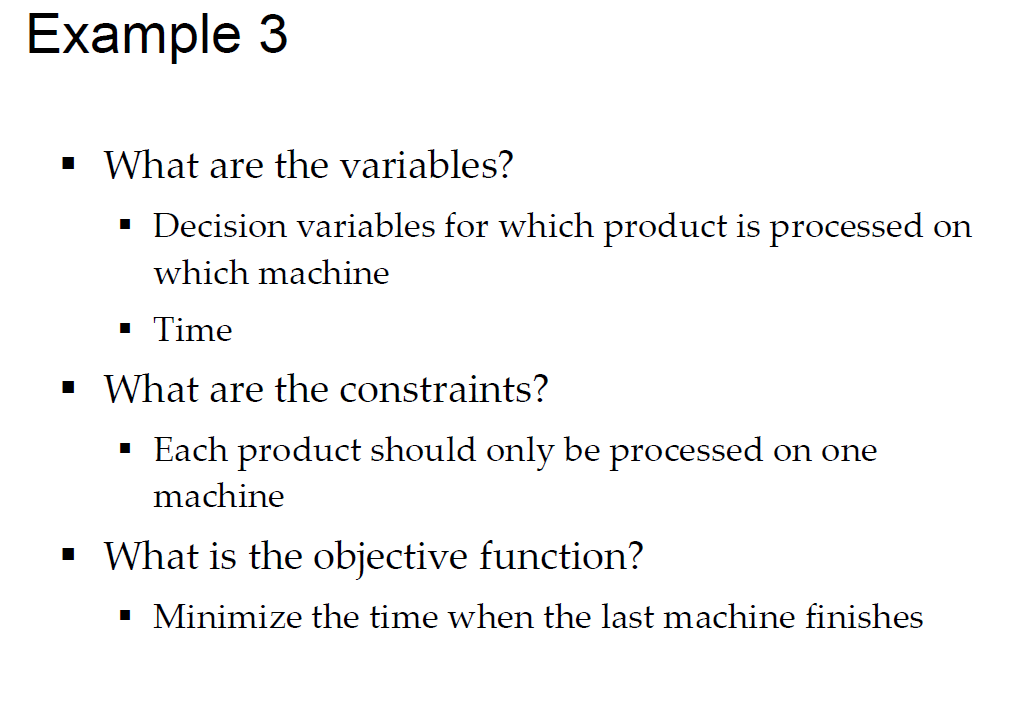

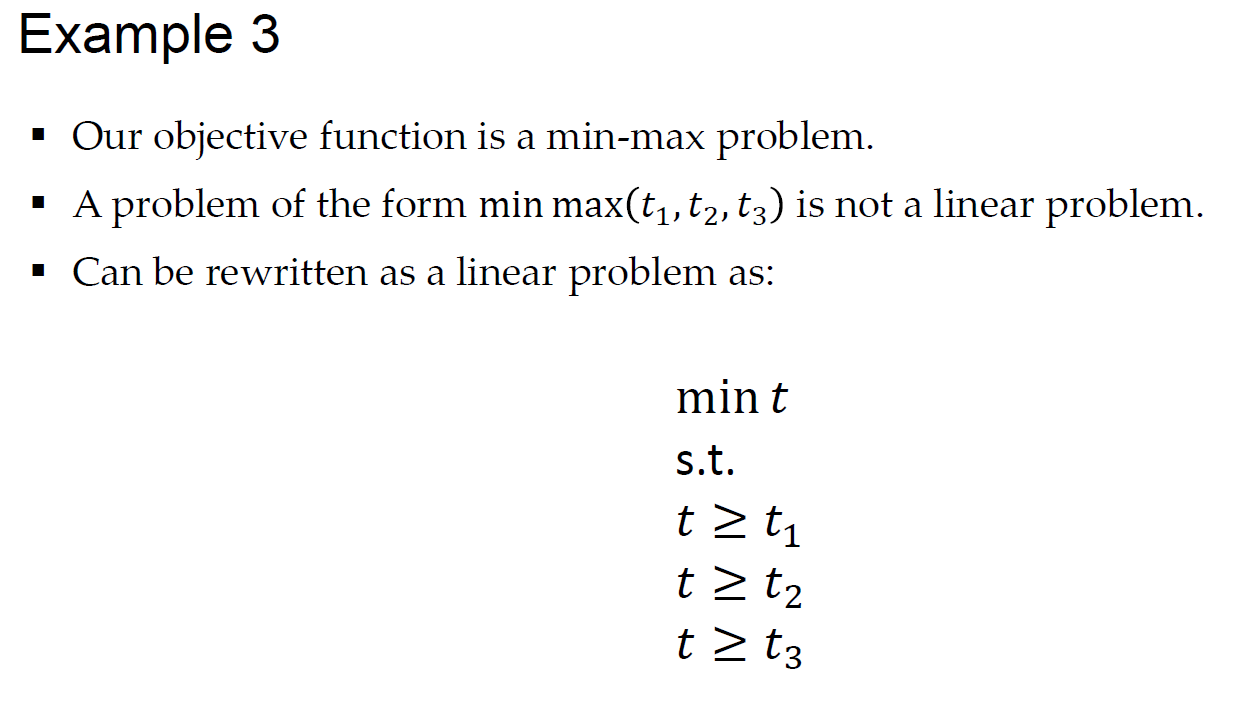

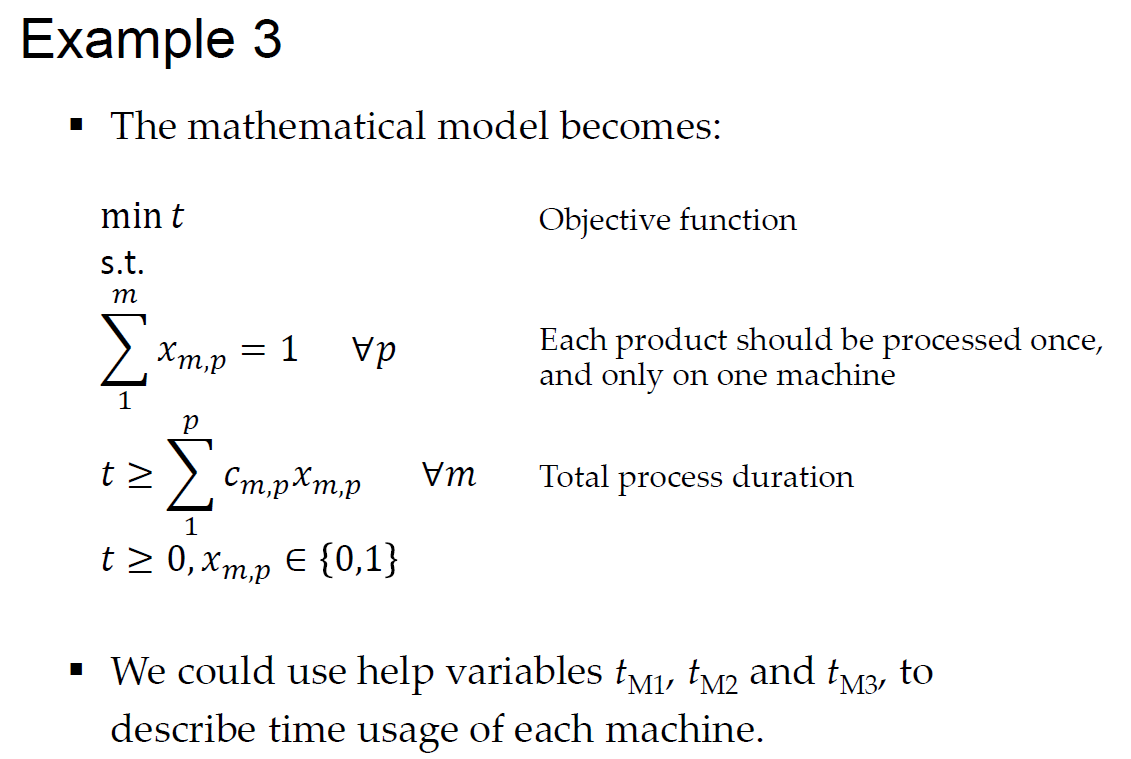

In [ ]:
from pyomo.environ import *

mod=ConcreteModel()

mod.m=Set(initialize=['M1','M2', 'M3'], ordered=True,doc='Machines')

#Create the list of products using Python code
#Note that the last element in range(n) is n-1, the first element is 0
P=[]
for i in range(1,13): P.append(('P'+str(i)))
mod.p=Set(initialize=P,ordered=True,doc='Products')

#Use the Python feature of assigning several variable values at once.
#E.g., x1,x2=3,4 is the same as x1=3 och x2=4.
c={}
c['M1','P1'],c['M1','P2'],c['M1','P3'],c['M1','P4'],c['M1','P5'],c['M1','P6'],\
c['M1','P7'],c['M1','P8'],c['M1','P9'],c['M1','P10'],c['M1','P11'],c['M1','P12']=2,3,4,5,3,5,2,7,1,3,2,4
c['M2','P1'],c['M2','P2'],c['M2','P3'],c['M2','P4'],c['M2','P5'],c['M2','P6'],\
c['M2','P7'],c['M2','P8'],c['M2','P9'],c['M2','P10'],c['M2','P11'],c['M2','P12']=3,2,3,7,2,6,1,6,1,4,3,4
c['M3','P1'],c['M3','P2'],c['M3','P3'],c['M3','P4'],c['M3','P5'],c['M3','P6'],\
c['M3','P7'],c['M3','P8'],c['M3','P9'],c['M3','P10'],c['M3','P11'],c['M3','P12']=2,3,3,6,1,3,4,4,2,3,2,4

mod.c=Param(mod.m,mod.p,initialize=c,doc='Processing time for p on m')

mod.x=Var(mod.m,mod.p,within=Binary,doc='Decision variable for a product on a machine')
mod.t=Var(within=NonNegativeReals,doc='Finishing time')

def Once_rule(mod,p):
    return sum(mod.x[m,p] for m in mod.m) == 1

mod.once=Constraint(mod.p,rule=Once_rule,doc='Produce the product once')

def Time_rule(mod,m):
     return mod.t >= sum(mod.c[m,p]*mod.x[m,p] for p in mod.p)

mod.time=Constraint(mod.m,rule=Time_rule,doc='Processing time on machine m')

mod.obj=Objective(expr=mod.t,sense=minimize,doc='Minimize time')
mod.pprint()

#Specify solver
solver = SolverFactory('cbc', executable='/usr/bin/cbc')

#Verbous solving
results = solver.solve(mod,tee=True)

#Ve can print values using the .value method of the object
print('All machines ready at time t=',mod.t.value)
#Prints the production plan, end='' prevents line change in Python 3
print('Production plan')
for m in mod.m:
    print(m,' : ',end='')
    for p in mod.p:
        if mod.x[m,p].value != 0:
            print(p,' ',end='')
    print(' ')



2 Set Declarations
    m : Machines
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'M1', 'M2', 'M3'}
    p : Products
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   12 : {'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12'}

1 Param Declarations
    c : Processing time for p on m
        Size=36, Index=m*p, Domain=Any, Default=None, Mutable=False
        Key           : Value
         ('M1', 'P1') :     2
        ('M1', 'P10') :     3
        ('M1', 'P11') :     2
        ('M1', 'P12') :     4
         ('M1', 'P2') :     3
         ('M1', 'P3') :     4
         ('M1', 'P4') :     5
         ('M1', 'P5') :     3
         ('M1', 'P6') :     5
         ('M1', 'P7') :     2
         ('M1', 'P8') :     7
         ('M1', 'P9') :     1
         ('M2', 'P1') :     3
        ('M2', 'P10') :     4
        ('M2'

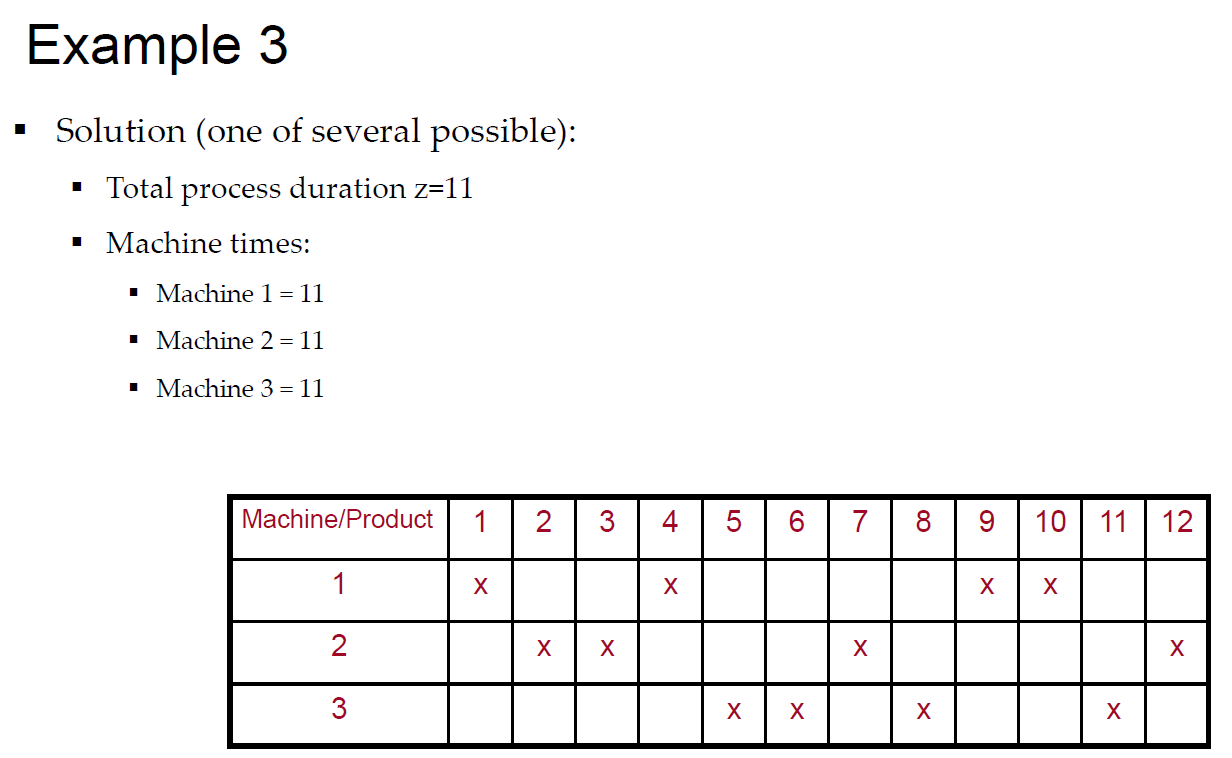